In [265]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasaexoplanets/cleaned_5250.csv


In [266]:
!pip install kaggle

In [267]:
df=pd.read_csv("/kaggle/input/nasaexoplanets/cleaned_5250.csv")

In [268]:
df.head()

name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   
4          16 Cygni B b      69.0            6.21500   Gas Giant   

   discovery_year  mass_multiplier mass_wrt  radius_multiplier radius_wrt  \
0            2007         19.40000  Jupiter               1.08    Jupiter   
1            2009         14.74000  Jupiter               1.09    Jupiter   
2            2008          4.80000  Jupiter               1.15    Jupiter   
3            2002          8.13881  Jupiter               1.12    Jupiter   
4            1996          1.78000  Jupiter               1.20    Jupiter   

   orbital_radius  orbital_period  eccentricity detection_method  
0        1.290000        0.892539          0.23  Radial Velocity  
1        1.530000        1.400000          0.08  Radial Velocity  
2        0.830000        0.508693          0.00  Radial Velocity  
3        2.773069        4.800000          0.37  Radial Velocity  
4        1.660000        2.200000          0.68  Radial Velocity

In [269]:
df.tail()

name  distance  stellar_magnitude  planet_type  discovery_year  \
5245     XO-7 b     764.0             10.521    Gas Giant            2019   
5246   YSES 2 b     357.0             10.885    Gas Giant            2021   
5247  YZ Ceti b      12.0             12.074  Terrestrial            2017   
5248  YZ Ceti c      12.0             12.074  Super Earth            2017   
5249  YZ Ceti d      12.0             12.074  Super Earth            2017   

      mass_multiplier mass_wrt  radius_multiplier radius_wrt  orbital_radius  \
5245            0.709  Jupiter              1.373    Jupiter         0.04421   
5246            6.300  Jupiter              1.140    Jupiter       115.00000   
5247            0.700    Earth              0.913      Earth         0.01634   
5248            1.140    Earth              1.050      Earth         0.02156   
5249            1.090    Earth              1.030      Earth         0.02851   

      orbital_period  eccentricity detection_method  
5245        0.007940          0.04          Transit  
5246     1176.500000          0.00   Direct Imaging  
5247        0.005476          0.06  Radial Velocity  
5248        0.008487          0.00  Radial Velocity  
5249        0.012868          0.07  Radial Velocity

# A Small Description of Each of the columns
- name: Name of the exoplanet
- distance: Distance of the planet from Earth(in light years)
- stellar magnitude: Absolute magnitude of the planet
- planet-type: type of the planet(compared with our solar system)
- discovery_year: Year on which the planet was discovered
- Finish it after completing the code

We are changing the mass of the exoplanets to a fixed planet mass which is the mass of Earth. *Jupiter is 318 times the mass of Earth*.

Therefore, the planets with masses equal to Jupiter should be multiplied by 318.

In [270]:
#Mass with respect to the mass of Earth
def mass_earth(a):
    if a["mass_wrt"]=="Earth":
        return a["mass_multiplier"]
    elif a["mass_wrt"]=="Jupiter":
        return a["mass_multiplier"]*318
#Radius with respect to the radius of Earth
def rad_earth(b):
    if b["radius_wrt"]=="Earth":
        return b["radius_multiplier"]
    elif b["radius_wrt"]=="Jupiter":
        return b["radius_multiplier"]*11.2

df["mass_multiplier"]=df.apply(mass_earth, axis=1)
df["radius_multiplier"]=df.apply(rad_earth, axis=1)        

In [271]:
df.head(4)

name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   

   discovery_year  mass_multiplier mass_wrt  radius_multiplier radius_wrt  \
0            2007       6169.20000  Jupiter             12.096    Jupiter   
1            2009       4687.32000  Jupiter             12.208    Jupiter   
2            2008       1526.40000  Jupiter             12.880    Jupiter   
3            2002       2588.14158  Jupiter             12.544    Jupiter   

   orbital_radius  orbital_period  eccentricity detection_method  
0        1.290000        0.892539          0.23  Radial Velocity  
1        1.530000        1.400000          0.08  Radial Velocity  
2        0.830000        0.508693          0.00  Radial Velocity  
3        2.773069        4.800000          0.37  Radial Velocity

In [272]:
df=df.rename(columns={"mass_multiplier": "mass_earth", "radius_multiplier":"radius_earth"})

In [273]:
df.head(4)

name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   

   discovery_year  mass_earth mass_wrt  radius_earth radius_wrt  \
0            2007  6169.20000  Jupiter        12.096    Jupiter   
1            2009  4687.32000  Jupiter        12.208    Jupiter   
2            2008  1526.40000  Jupiter        12.880    Jupiter   
3            2002  2588.14158  Jupiter        12.544    Jupiter   

   orbital_radius  orbital_period  eccentricity detection_method  
0        1.290000        0.892539          0.23  Radial Velocity  
1        1.530000        1.400000          0.08  Radial Velocity  
2        0.830000        0.508693          0.00  Radial Velocity  
3        2.773069        4.800000          0.37  Radial Velocity

In [274]:
df.isnull().any()

name                 False
distance              True
stellar_magnitude     True
planet_type          False
discovery_year       False
mass_earth            True
mass_wrt              True
radius_earth          True
radius_wrt            True
orbital_radius        True
orbital_period       False
eccentricity         False
detection_method     False
dtype: bool

In [275]:
df.isnull().sum()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_earth            23
mass_wrt              23
radius_earth          17
radius_wrt            17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

In [276]:
df.drop(["mass_wrt", "radius_wrt"], axis=1, inplace=True)

In [277]:
df.head()

name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   
4          16 Cygni B b      69.0            6.21500   Gas Giant   

   discovery_year  mass_earth  radius_earth  orbital_radius  orbital_period  \
0            2007  6169.20000        12.096        1.290000        0.892539   
1            2009  4687.32000        12.208        1.530000        1.400000   
2            2008  1526.40000        12.880        0.830000        0.508693   
3            2002  2588.14158        12.544        2.773069        4.800000   
4            1996   566.04000        13.440        1.660000        2.200000   

   eccentricity detection_method  
0          0.23  Radial Velocity  
1          0.08  Radial Velocity  
2          0.00  Radial Velocity  
3          0.37  Radial Velocity  
4          0.68  Radial Velocity

In [278]:
df.dropna(subset=["mass_earth", "radius_earth"])
df.describe(include="all")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


name      distance  stellar_magnitude   planet_type  \
count                   5250   5233.000000        5089.000000          5250   
unique                  5250           NaN                NaN             5   
top     11 Comae Berenices b           NaN                NaN  Neptune-like   
freq                       1           NaN                NaN          1825   
mean                     NaN   2167.168737          12.683738           NaN   
std                      NaN   3245.522087           3.107571           NaN   
min                      NaN      4.000000           0.872000           NaN   
25%                      NaN    389.000000          10.939000           NaN   
50%                      NaN   1371.000000          13.543000           NaN   
75%                      NaN   2779.000000          15.021000           NaN   
max                      NaN  27727.000000          44.610000           NaN   

        discovery_year     mass_earth  radius_earth  orbital_radius  \
count      5250.000000    5227.000000   5233.000000     4961.000000   
unique             NaN            NaN           NaN             NaN   
top                NaN            NaN           NaN             NaN   
freq               NaN            NaN           NaN             NaN   
mean       2015.732190     460.035228      5.627083        6.962942   
std           4.307336    3761.458717      5.315522      138.673600   
min        1992.000000       0.020000      0.296000        0.004400   
25%        2014.000000       3.970000      1.760000        0.053000   
50%        2016.000000       8.470000      2.732800        0.102800   
75%        2018.000000     159.000000     11.715200        0.286000   
max        2023.000000  239136.000000     77.280000     7506.000000   

        orbital_period  eccentricity detection_method  
count     5.250000e+03   5250.000000             5250  
unique             NaN           NaN               11  
top                NaN           NaN          Transit  
freq               NaN           NaN             3945  
mean      4.791509e+02      0.063568              NaN  
std       1.680445e+04      0.141424              NaN  
min       2.737851e-04     -0.520000              NaN  
25%       1.259411e-02      0.000000              NaN  
50%       3.449692e-02      0.000000              NaN  
75%       1.442163e-01      0.060000              NaN  
max       1.101370e+06      0.950000              NaN

In [279]:
df.isnull().sum()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_earth            23
radius_earth          17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

In [280]:
#Considering the most frequently occurring distance for the exoplanets
df["distance"].fillna(df["distance"].mode()[0], inplace=True)

<ipython-input-280-50e46635d652>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["distance"].fillna(df["distance"].mode()[0], inplace=True)


In [281]:
df["distance"].isnull().sum()

0

In [282]:
#Considering an average value for the stellar magnitude
print(df["stellar_magnitude"].mean())

12.683737796030655


In [283]:
df["stellar_magnitude"].fillna(df["stellar_magnitude"].mean(), inplace=True)

<ipython-input-283-ffed50c7c9cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["stellar_magnitude"].fillna(df["stellar_magnitude"].mean(), inplace=True)


In [284]:
df["stellar_magnitude"].isnull().sum()

0

In [285]:
#Considering the mean and mode for the orbital_radius, mass_earth and radius_earth respectively
df["mass_earth"].fillna(df["mass_earth"].mean(), inplace=True)
df["orbital_radius"].fillna(df["orbital_radius"].mode()[0], inplace=True)
df["radius_earth"].fillna(df["radius_earth"].mean(), inplace=True)

<ipython-input-285-9d79c2d9c681>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mass_earth"].fillna(df["mass_earth"].mean(), inplace=True)
<ipython-input-285-9d79c2d9c681>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [286]:
df.isnull().sum()

name                 0
distance             0
stellar_magnitude    0
planet_type          0
discovery_year       0
mass_earth           0
radius_earth         0
orbital_radius       0
orbital_period       0
eccentricity         0
detection_method     0
dtype: int64

In [287]:
#Applying absolute value for eccentricity as it cannot be negative
df["eccentricity"]=df["eccentricity"].apply(abs)

In [288]:
df.columns.tolist()

['name',
 'distance',
 'stellar_magnitude',
 'planet_type',
 'discovery_year',
 'mass_earth',
 'radius_earth',
 'orbital_radius',
 'orbital_period',
 'eccentricity',
 'detection_method']

**Data Visualization**

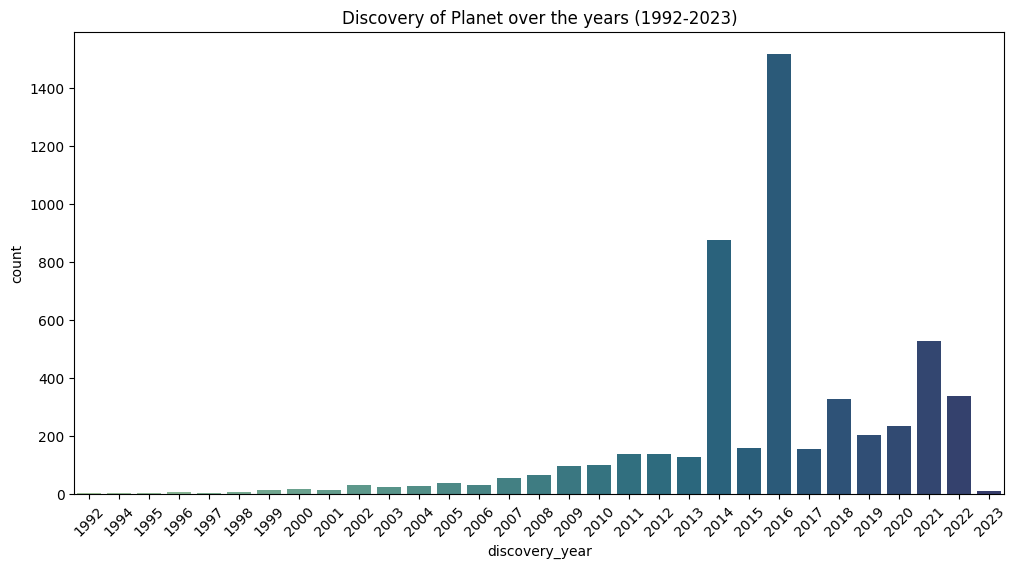

In [289]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x="discovery_year", data=df, palette="crest")
plt.xticks(rotation=45)
plt.title("Discovery of Planet over the years (1992-2023)")
plt.show()

- Maximum number of exoplanets were observed during the year 2014 and 2016
- The first confirmed exoplanet was discovered in the year 1992 around a pulsar.
- Kepler space telescope observed the largest number of exoplanets in 2016 in one sweep

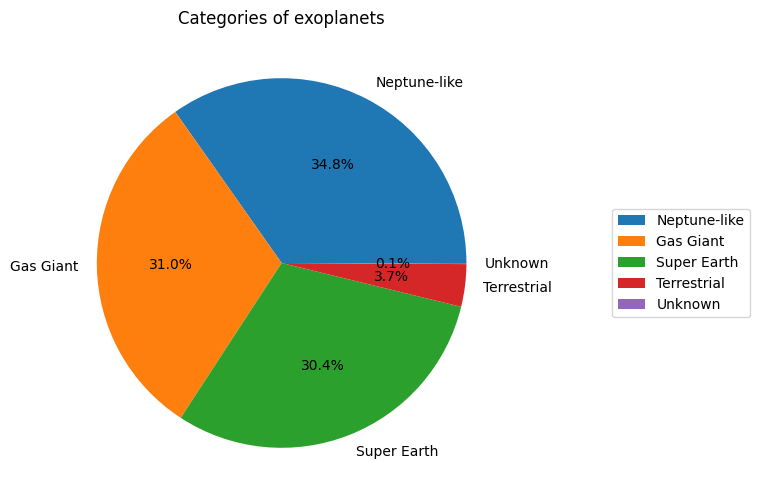

In [290]:
#Pie chart to visualize the different categories of exoplanets
df["planet_type"].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,6))
plt.legend(bbox_to_anchor=(1.2, 0.5), loc="center left")
plt.title("Categories of exoplanets")
plt.ylabel("")
plt.show()

- Super Earth and Terrestial can be considered as habitable planets
- Gas Giant and Neptune can be considered as non-habitable planets

In [291]:
df.head()

name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   
4          16 Cygni B b      69.0            6.21500   Gas Giant   

   discovery_year  mass_earth  radius_earth  orbital_radius  orbital_period  \
0            2007  6169.20000        12.096        1.290000        0.892539   
1            2009  4687.32000        12.208        1.530000        1.400000   
2            2008  1526.40000        12.880        0.830000        0.508693   
3            2002  2588.14158        12.544        2.773069        4.800000   
4            1996   566.04000        13.440        1.660000        2.200000   

   eccentricity detection_method  
0          0.23  Radial Velocity  
1          0.08  Radial Velocity  
2          0.00  Radial Velocity  
3          0.37  Radial Velocity  
4          0.68  Radial Velocity

In [292]:
print(df["detection_method"].unique())

['Radial Velocity' 'Direct Imaging' 'Eclipse Timing Variations' 'Transit'
 'Astrometry' 'Disk Kinematics' 'Transit Timing Variations'
 'Orbital Brightness Modulation' 'Pulsation Timing Variations'
 'Gravitational Microlensing' 'Pulsar Timing']


In [293]:
#Bar chart to see the detection of planets
df_bar=df.groupby("detection_method")["planet_type"].value_counts().reset_index()
df_bar = df_bar.sort_values(by="count", ascending=True)
df_bar.head()

detection_method  planet_type  count
19             Radial Velocity  Terrestrial      1
3              Disk Kinematics    Gas Giant      1
14               Pulsar Timing  Terrestrial      1
8   Gravitational Microlensing  Terrestrial      1
0                   Astrometry    Gas Giant      2

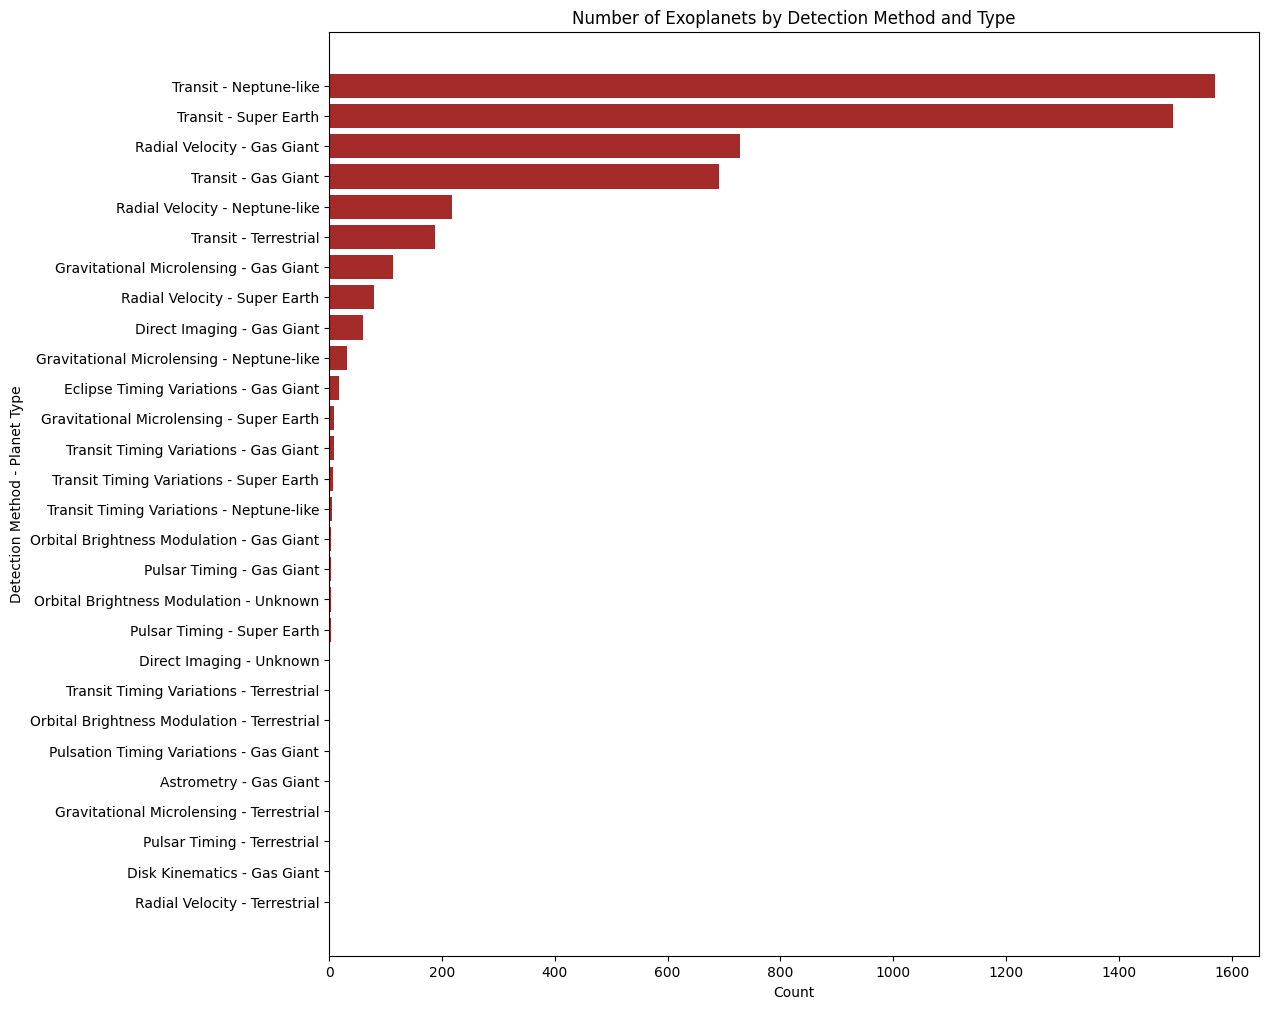

In [294]:
plt.figure(figsize=(12,12))
plt.barh(df_bar["detection_method"] + " - " + df_bar["planet_type"], df_bar["count"], color="brown")  # Horizontal bar chart
plt.xlabel("Count")
plt.ylabel("Detection Method - Planet Type")
plt.title("Number of Exoplanets by Detection Method and Type")
plt.show()

- planets closer to the host star are easily detected by trasit surveys than radial velocity method and is most sensitive to the planet with small orbits.

In [295]:
log_mass = np.log10(df["mass_earth"])
def log_to_lin(x, pos):
    return f"{10**x:.2f}"

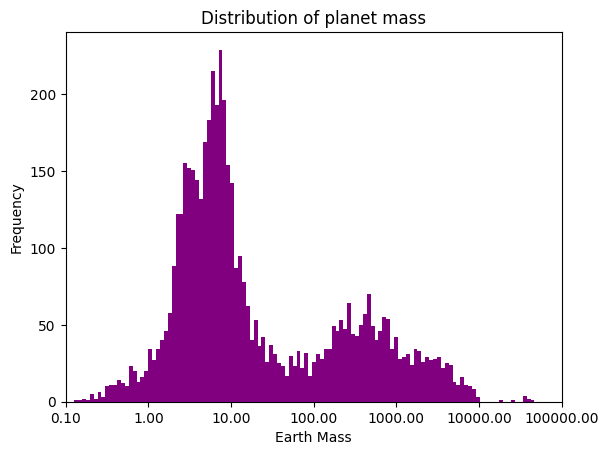

In [296]:
from matplotlib.ticker import FuncFormatter
plt.hist(log_mass, bins=150, color="purple")
plt.xlim(-1,5)
plt.xlabel("Earth Mass")
plt.ylabel("Frequency")
plt.title("Distribution of planet mass")
plt.gca().xaxis.set_major_formatter(FuncFormatter(log_to_lin))
plt.show()

- the bimodal curve's first peak by Super Earths and Neptunian planets
- Second curve by gas giants

In [297]:
log_radius = np.log10(df["radius_earth"])
def log_to_lin(x, pos):
    return f"{10**x:.2f}"
df.head()

name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   
4          16 Cygni B b      69.0            6.21500   Gas Giant   

   discovery_year  mass_earth  radius_earth  orbital_radius  orbital_period  \
0            2007  6169.20000        12.096        1.290000        0.892539   
1            2009  4687.32000        12.208        1.530000        1.400000   
2            2008  1526.40000        12.880        0.830000        0.508693   
3            2002  2588.14158        12.544        2.773069        4.800000   
4            1996   566.04000        13.440        1.660000        2.200000   

   eccentricity detection_method  
0          0.23  Radial Velocity  
1          0.08  Radial Velocity  
2          0.00  Radial Velocity  
3          0.37  Radial Velocity  
4          0.68  Radial Velocity

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


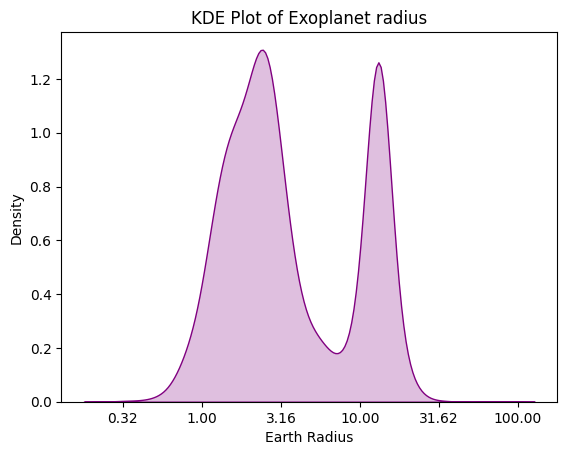

In [298]:
sns.kdeplot(log_radius, fill=True, color="purple")
plt.xlabel("Earth Radius")
plt.ylabel("Density")
plt.title("KDE Plot of Exoplanet radius")
plt.gca().xaxis.set_major_formatter(FuncFormatter(log_to_lin))
plt.show()

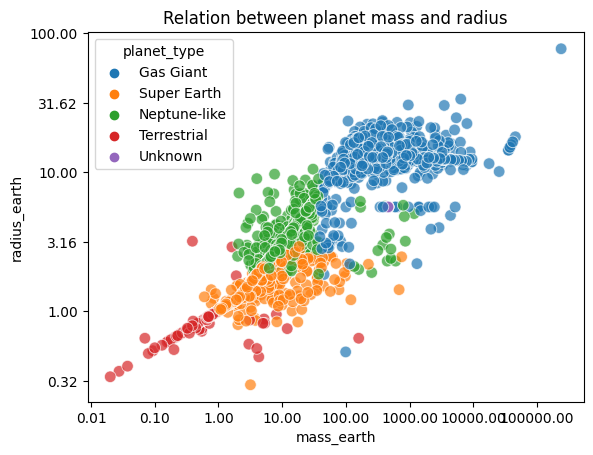

In [299]:
#Relation between planet mass and radius
sns.scatterplot(x=log_mass, y=log_radius, data=df, hue="planet_type", alpha=0.7,s=70)
plt.gca().xaxis.set_major_formatter(FuncFormatter(log_to_lin))
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_to_lin))
plt.title("Relation between planet mass and radius")
plt.show()

In [300]:
log_period = np.log10(df["orbital_period"])
log_orbital_radius=np.log10(df["orbital_radius"])
def log_to_lin(x, pos):
    return f"{10**x:.2f}"
df.head()

name  distance  stellar_magnitude planet_type  \
0  11 Comae Berenices b     304.0            4.72307   Gas Giant   
1    11 Ursae Minoris b     409.0            5.01300   Gas Giant   
2       14 Andromedae b     246.0            5.23133   Gas Giant   
3         14 Herculis b      58.0            6.61935   Gas Giant   
4          16 Cygni B b      69.0            6.21500   Gas Giant   

   discovery_year  mass_earth  radius_earth  orbital_radius  orbital_period  \
0            2007  6169.20000        12.096        1.290000        0.892539   
1            2009  4687.32000        12.208        1.530000        1.400000   
2            2008  1526.40000        12.880        0.830000        0.508693   
3            2002  2588.14158        12.544        2.773069        4.800000   
4            1996   566.04000        13.440        1.660000        2.200000   

   eccentricity detection_method  
0          0.23  Radial Velocity  
1          0.08  Radial Velocity  
2          0.00  Radial Velocity  
3          0.37  Radial Velocity  
4          0.68  Radial Velocity

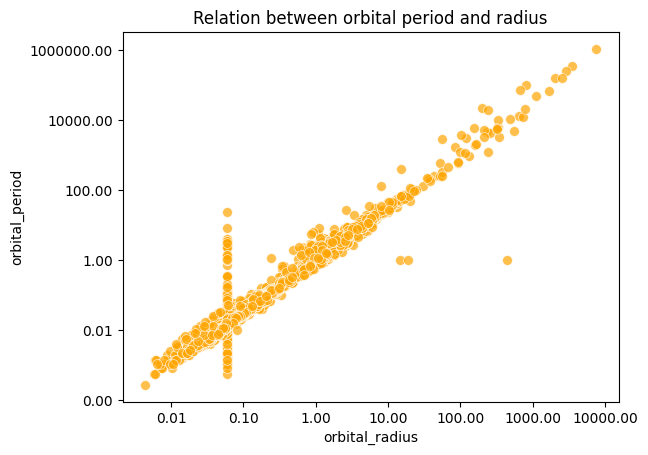

In [301]:
#Orbital Period and Radius
sns.scatterplot(x=log_orbital_radius, y=log_period, data=df, alpha=0.7,s=50, color="orange")
plt.gca().xaxis.set_major_formatter(FuncFormatter(log_to_lin))
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_to_lin))
plt.title("Relation between orbital period and radius")
plt.show()

- greater the distance from the primary star larger is the orbital period
- linear relationship, increase in orbital radius means greater orbital period
- the straight line is the fault is the data that is covered my replacing the missing values and can be ignored